<font size="+3"><strong>1.4. Location or Size: What Influences House Prices in Mexico?</strong></font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import VimeoVideo

### Importing the data 

In [3]:
Mexico_df = pd.read_csv("C:\\Users\\USER\\OneDrive\\CB\Projects\\Projects_Jackrony\\WorldQuant\\Housing_Mexico\\Data\\mexico-real-estate-cleaned Data.csv")
Mexico_df.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucatán,21.052583,-89.538639,205,105191.37


## Research Question 1

**Which state has the most expensive real estate market?**

Do housing prices vary by state? If so, which are the most expensive states for purchasing a home? During our exploratory data analysis, we used descriptive statistics like mean and median to get an idea of the "typical" house price in Mexico. Now, we need to break that calculation down by state and visualize the results. 

We know in which state each house is located thanks to the `"state"` column. The next step is to divide our dataset into groups (one per state) and calculate the mean house price for each group.

In [4]:
# Declare variable `mean_price_by_state`
mean_price_by_state = Mexico_df.groupby(by= ['state'])['price_usd'].mean().sort_values(ascending = False).round(2)

# Print object type, shape, and head
print("mean_price_by_state type:", type(mean_price_by_state))
print("mean_price_by_state shape:", mean_price_by_state.shape)
mean_price_by_state.head()

mean_price_by_state type: <class 'pandas.core.series.Series'>
mean_price_by_state shape: (30,)


state
Querétaro           133955.91
Guanajuato          133277.97
Nuevo León          129221.99
Distrito Federal    128347.27
Quintana Roo        128065.42
Name: price_usd, dtype: float64

#### Visualizing the Average Price per state

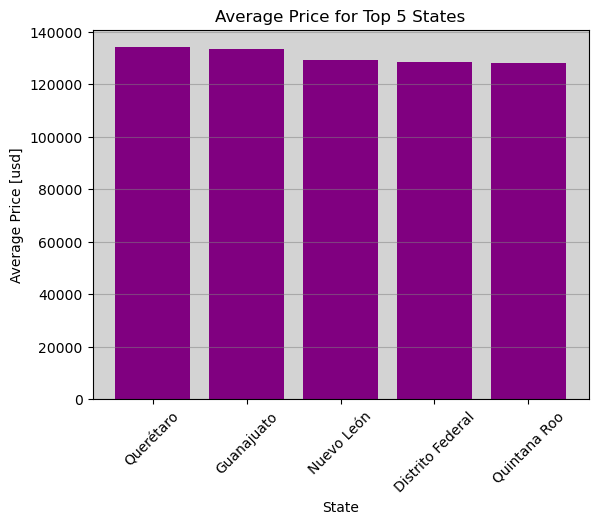

In [5]:
# Create bar chart from `mean_price_by_state` using pandas
plt.figure(facecolor='white')

#Plotting
plt.bar(x= mean_price_by_state.head().index,
       height = mean_price_by_state.head().values,
       color = "purple")

#Labelling
plt.xlabel("State")
plt.ylabel("Average Price [usd]")
plt.title("Average Price for Top 5 States")

#Grid lines
plt.grid(axis="y", alpha=0.5, color = 'grey')

#Rotating the X Labels
plt.xticks(rotation=45)

#Setting the chart are colour
ax = plt.gca()
ax.set_facecolor('lightgrey')

plt.show()


It seems odd that Querétaro would be the most expensive real estate market in Mexico when, [according to recent GDP numbers](https://en.wikipedia.org/wiki/List_of_Mexican_states_by_GDP), it's not in the top 10 state economies. With all the variations in house sizes across states, a better metric to look at would be price per m<sup>2</sup>. In order to do that, we need to create a new column.

#### Creating New Col of price per sq meter

In [6]:
Mexico_df['price_per_m2'] = Mexico_df['price_usd'] / Mexico_df['area_m2']

Mexico_df.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
4,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634


#### Visualizing the average price per m2 for top 5 states 

In [7]:
# Grouping and aggregating the df 
Mexico_df.groupby(by = ['state'])['price_per_m2'].mean().sort_values(ascending = False).head()

state
Distrito Federal    1175.889150
Estado de México     763.753423
Guerrero             761.557207
Jalisco              743.568106
Quintana Roo         736.455283
Name: price_per_m2, dtype: float64

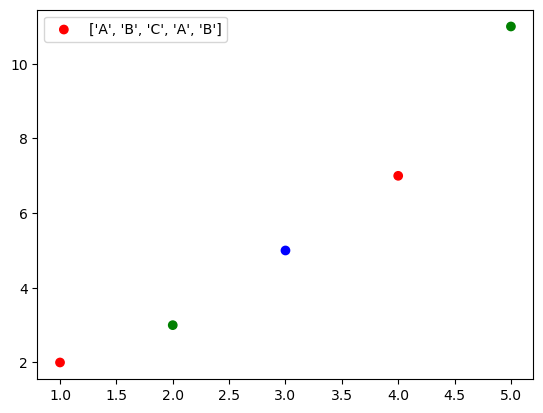

In [8]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]
states = ['A', 'B', 'C', 'A', 'B']  # Sample states corresponding to each data point

# Define colors for each state
colors = {'A': 'red', 'B': 'green', 'C': 'blue'}

# Create a scatter plot
plt.scatter(x, y, c=[colors[state] for state in states], label=states)

# Add legend
plt.legend()

plt.show()


In [9]:
p_correlation = Mexico_df[['area_m2', 'price_usd']].corr()

In [21]:
### Correlations


states_df = {state: Mexico_df[Mexico_df['state'] == state] for state in Mexico_df['state'].unique()}

for state, df in states_df.items():
    correl = df[['area_m2', 'price_usd']].corr()
    print(f'Correlation of State > : {state}\n {correl} \n')

Correlation of State > : Estado de México
            area_m2  price_usd
area_m2    1.00000    0.63011
price_usd  0.63011    1.00000 

Correlation of State > : Nuevo León
             area_m2  price_usd
area_m2    1.000000   0.578696
price_usd  0.578696   1.000000 

Correlation of State > : Guerrero
             area_m2  price_usd
area_m2    1.000000   0.674457
price_usd  0.674457   1.000000 

Correlation of State > : Yucatán
             area_m2  price_usd
area_m2    1.000000   0.740413
price_usd  0.740413   1.000000 

Correlation of State > : Querétaro
             area_m2  price_usd
area_m2    1.000000   0.819374
price_usd  0.819374   1.000000 

Correlation of State > : Morelos
             area_m2  price_usd
area_m2    1.000000   0.849808
price_usd  0.849808   1.000000 

Correlation of State > : Chiapas
             area_m2  price_usd
area_m2    1.000000   0.755961
price_usd  0.755961   1.000000 

Correlation of State > : Tabasco
             area_m2  price_usd
area_m2    1.000000 

In [18]:
type(states_df)

list

In [19]:
states_df

[     property_type             state        lat        lon  area_m2  \
 0            house  Estado de México  19.560181 -99.233528      150   
 8            house  Estado de México  19.305407 -99.646948      235   
 12           house  Estado de México  19.560181 -99.233528       85   
 27           house  Estado de México  19.538595 -99.180214      200   
 46           house  Estado de México  19.715134 -99.214828      126   
 ...            ...               ...        ...        ...      ...   
 1695         house  Estado de México  19.537234 -99.025536       83   
 1700         house  Estado de México  19.524088 -99.096736       75   
 1715     apartment  Estado de México  19.607218 -99.194926      100   
 1716         house  Estado de México  19.161759 -99.617825       85   
 1735         house  Estado de México  19.233201 -99.558519      115   
 
       price_usd  price_per_m2  
 0      67965.56    453.103733  
 8     115937.75    493.352128  
 12     63238.77    743.985529  
 2